<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом! 

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
 
Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах

## Подготовка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
import catboost as cb

from sklearn.model_selection import cross_val_score, GridSearchCV , train_test_split, TimeSeriesSplit 

from sklearn.metrics import make_scorer, mean_squared_error 

In [2]:
data = pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0]) 
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [3]:
data.index.is_monotonic

True

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


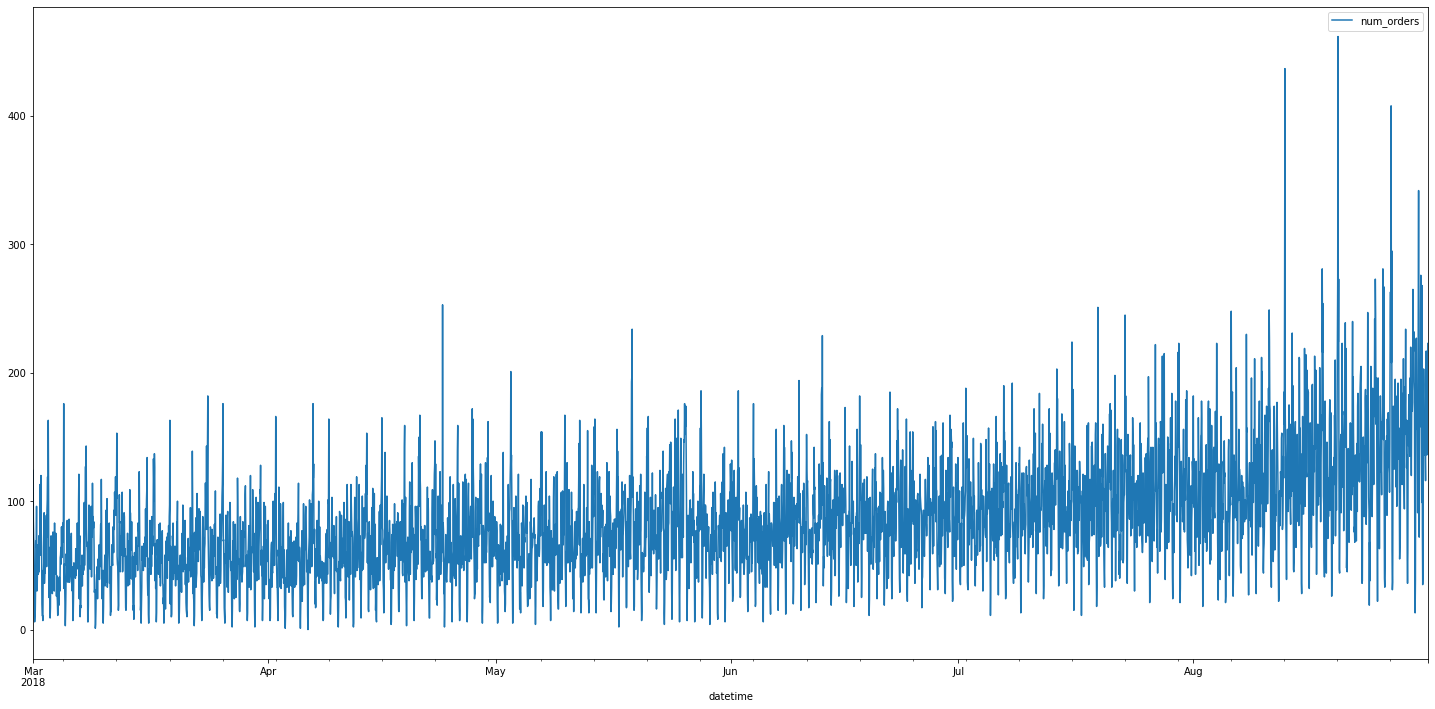

In [4]:
data.sort_index(inplace=True)
data.info()
data = data.resample('1H').sum() 
figsize=(25,12)
data.plot(figsize=figsize);

Данные с 1 марта 2018 года, по 31 августа 2018 года. С августа видим, что количество заказов стремительно увеличивается. Так же на протяжение всего периода наблюдаем пики в апреле и мае.

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b> 
    
С данными познакомились, проведен первичный аналитический осмотр!) Отлично, что проведено ресемплирование с использованием суммы. Полученная информация поможет нам в дальнейшем с предобработкой данных

## Анализ

In [5]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Данные собраны за 183 дня и 23 часа. Минимальное количество заказов за 1 час: 0, а максимальное: 462.

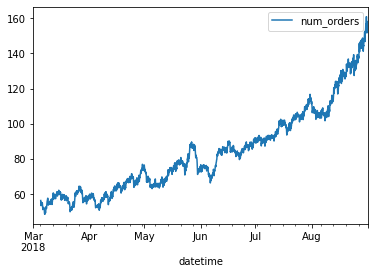

In [6]:
data.rolling(100).mean().plot();

Наблюдается тенденция роста. Меньше всего подвержены колубаниям значения в период с середины августа и и с с середины июня по конец июля.

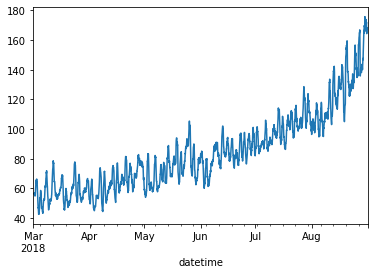

In [7]:
decomposed = seasonal_decompose(data)
decomposed.trend.plot(); # тренд

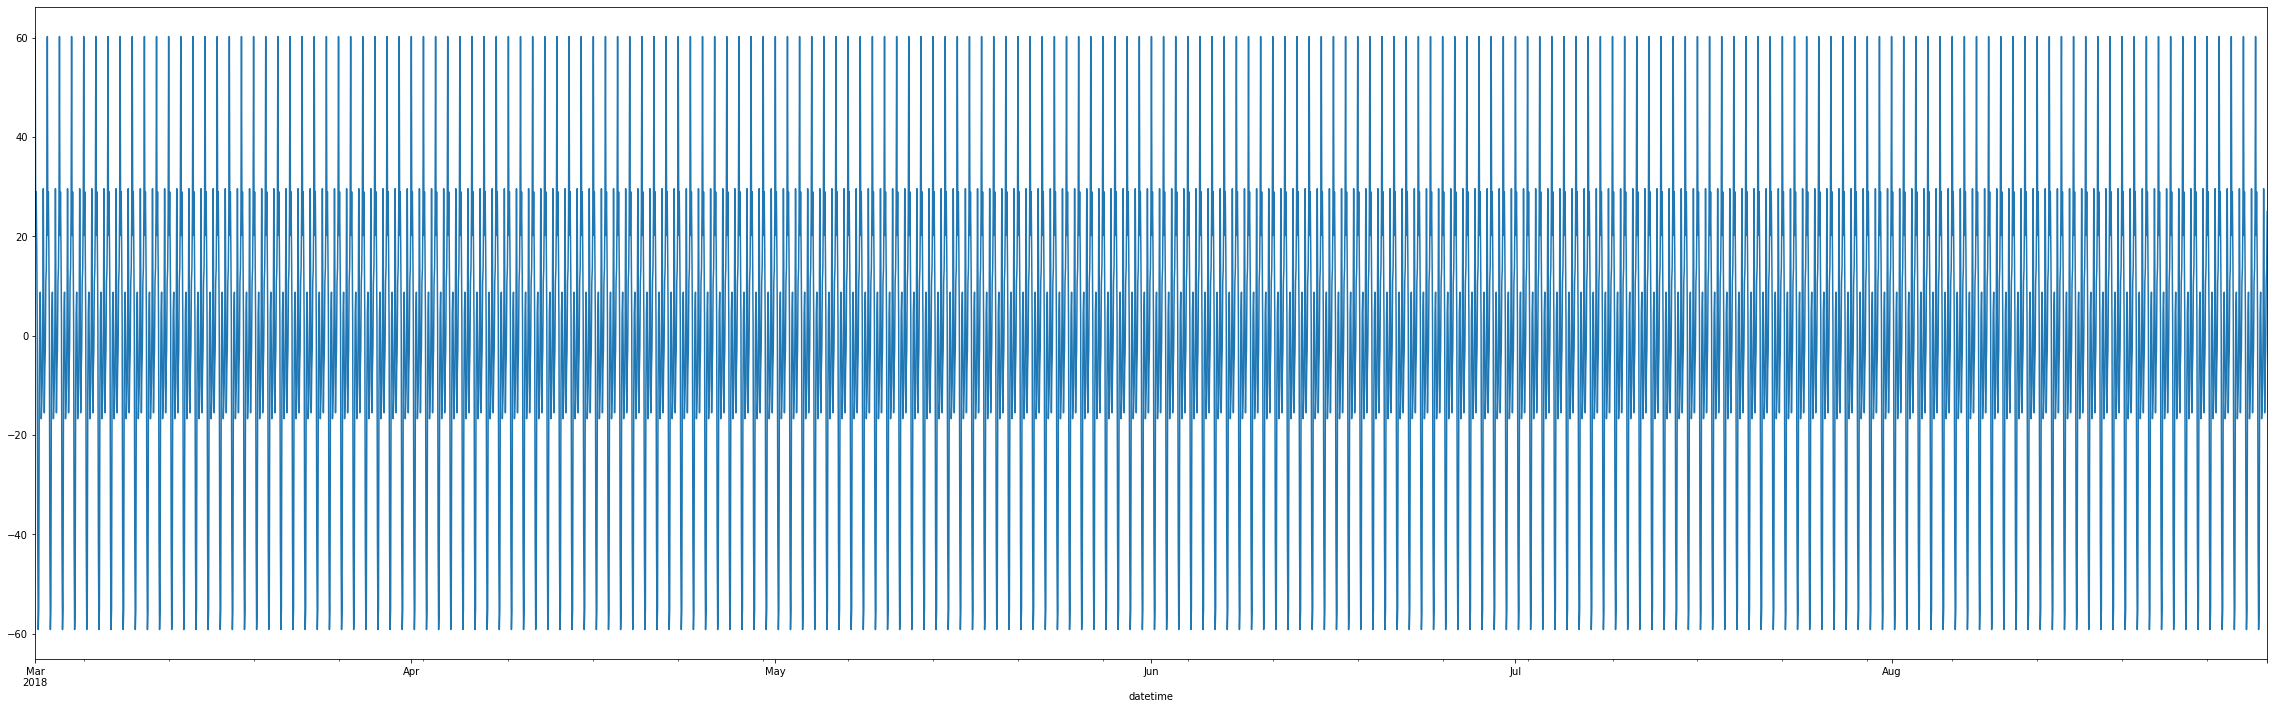

In [8]:
plt.figure(figsize=(40, 12))
decomposed.seasonal.plot(ax=plt.gca()); # сезонная составляющая

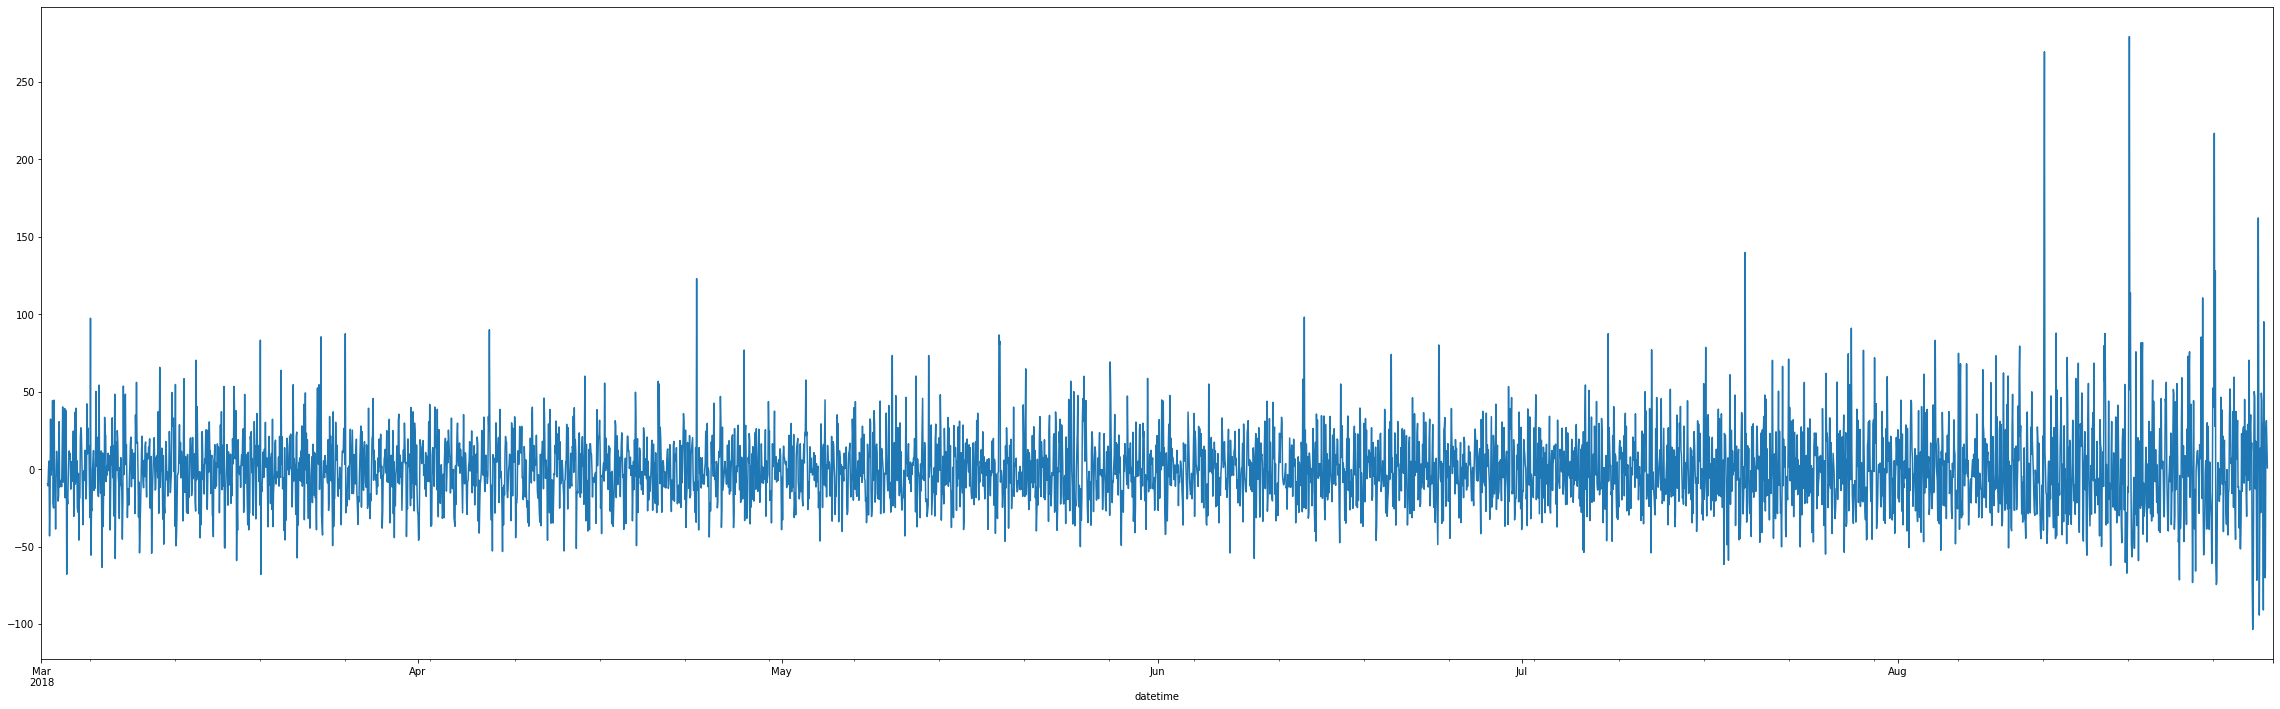

In [9]:
plt.figure(figsize=(40, 12))
decomposed.resid.plot();

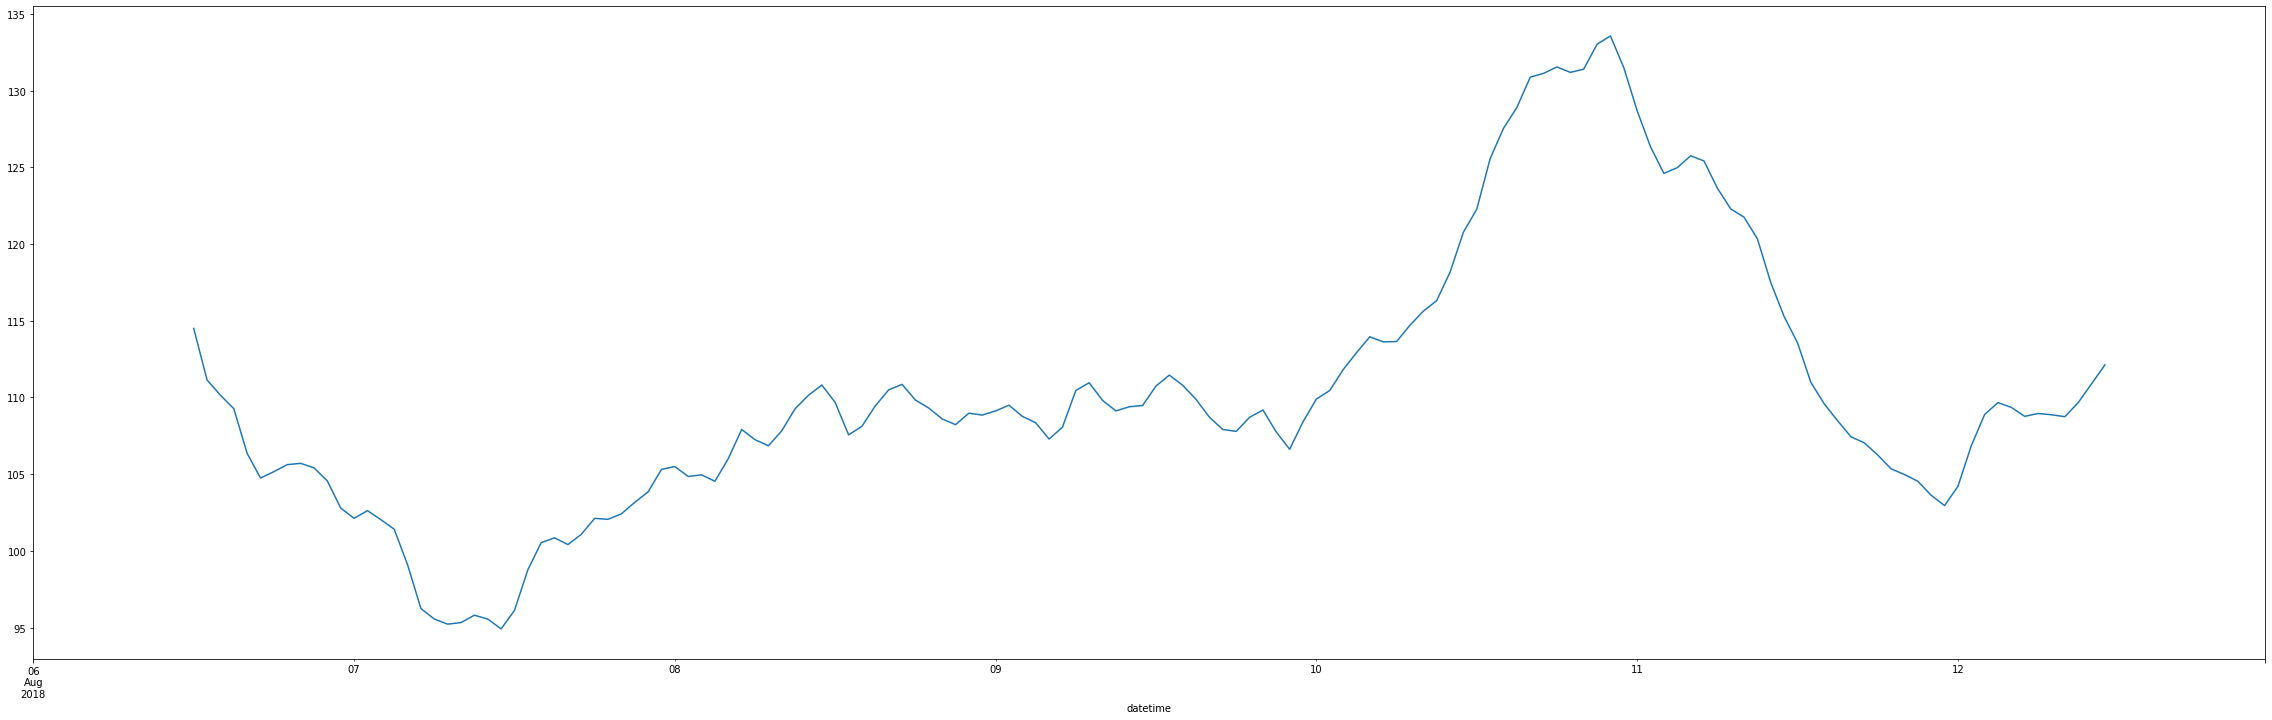

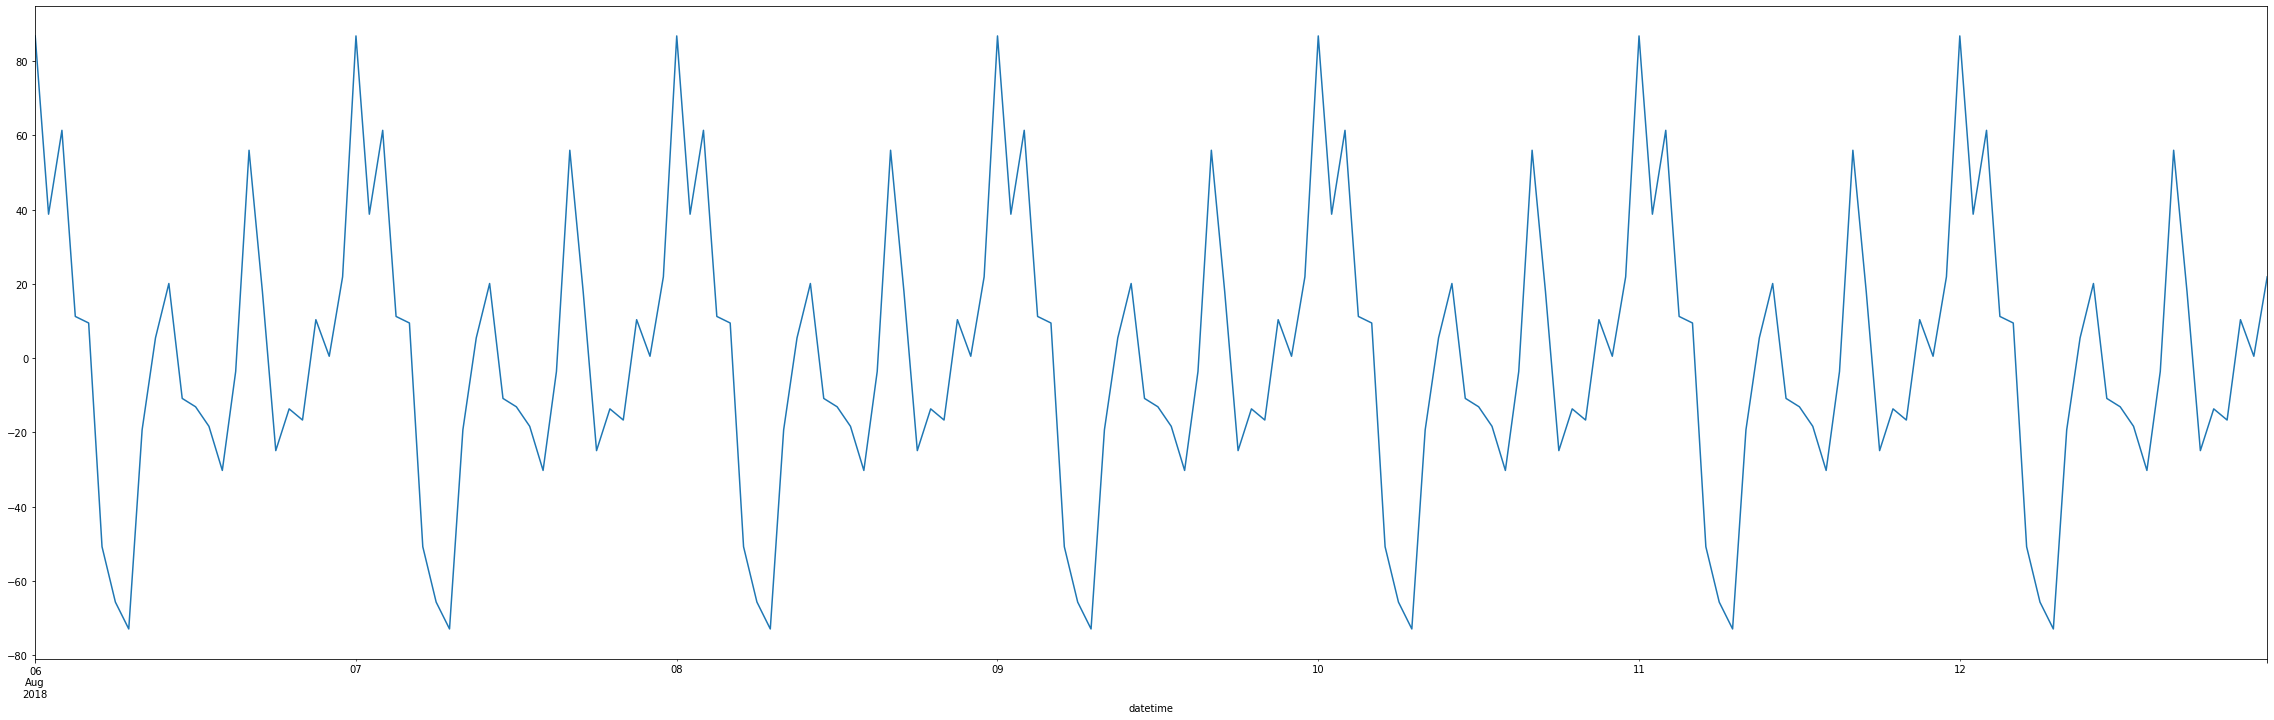

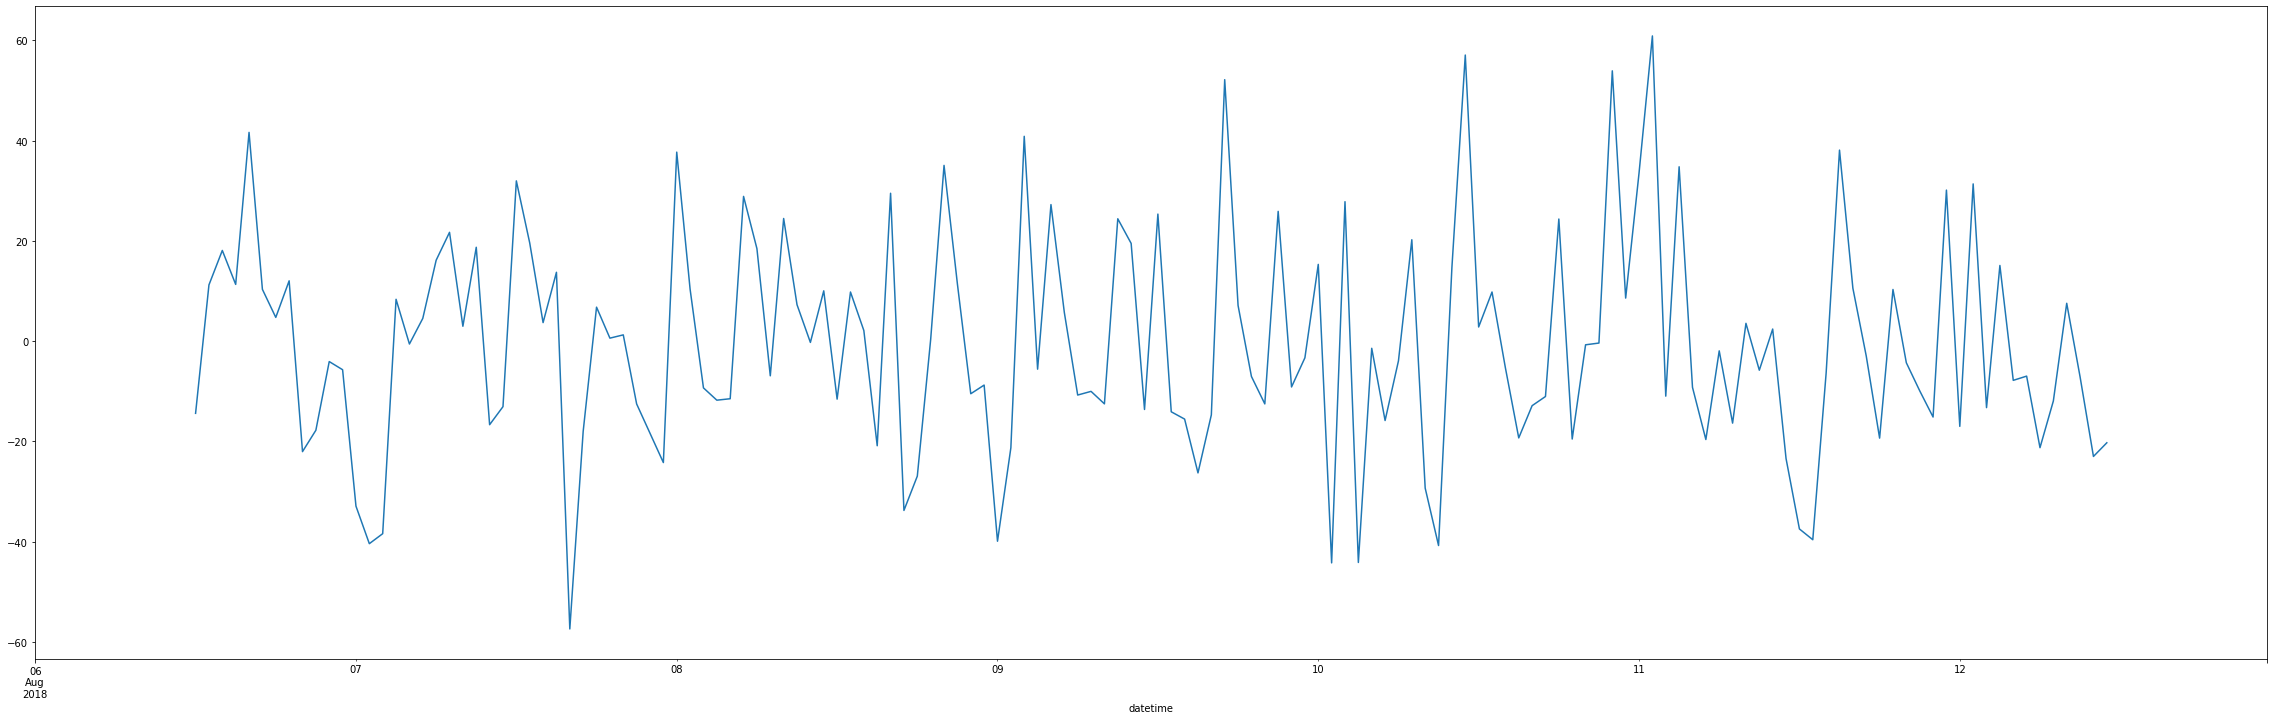

In [10]:
decomposed = seasonal_decompose(data['2018-08-06':'2018-08-12']) #с пн по вс в августе

plt.figure(figsize=(40, 12))
decomposed.trend.plot() # тренд
plt.figure(figsize=(40, 12))
decomposed.seasonal.plot() # сезонная составляющая
plt.figure(figsize=(40,12))
decomposed.resid.plot(); # остаток декомпозиции


Тренд: количество заказов увеличивается с наступлением выходныых, максимальное их количество приходиться на вечер пятницы.

Сезонность: обнаружена сезонность, Вечером в час пик количество заказов увеличивается, а ночью стремиться к нулю.

Ряд нестационарный, так как дисперсия меняется со случайным распределением

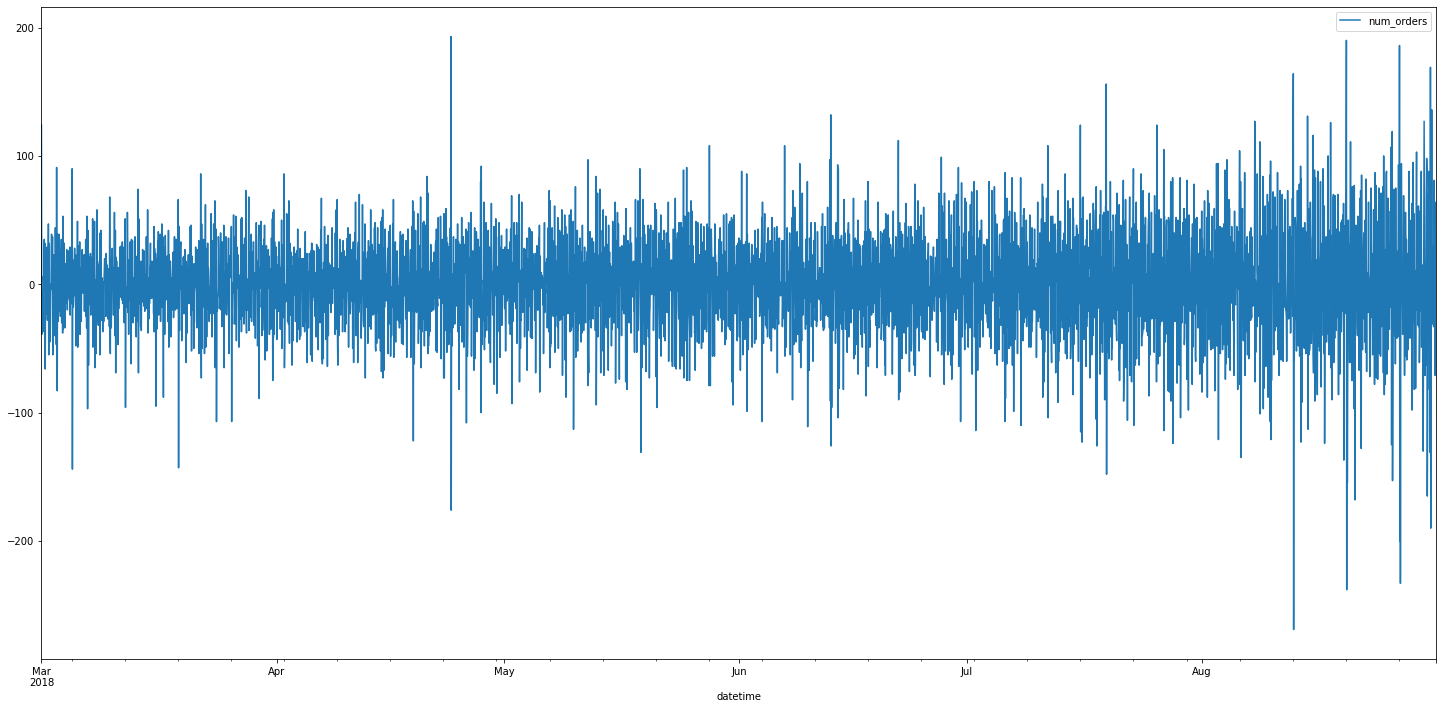

In [11]:
data_shift=data - data.shift(fill_value=0);
data_shift.plot(figsize=figsize);

Разности временного ряда более стационарны

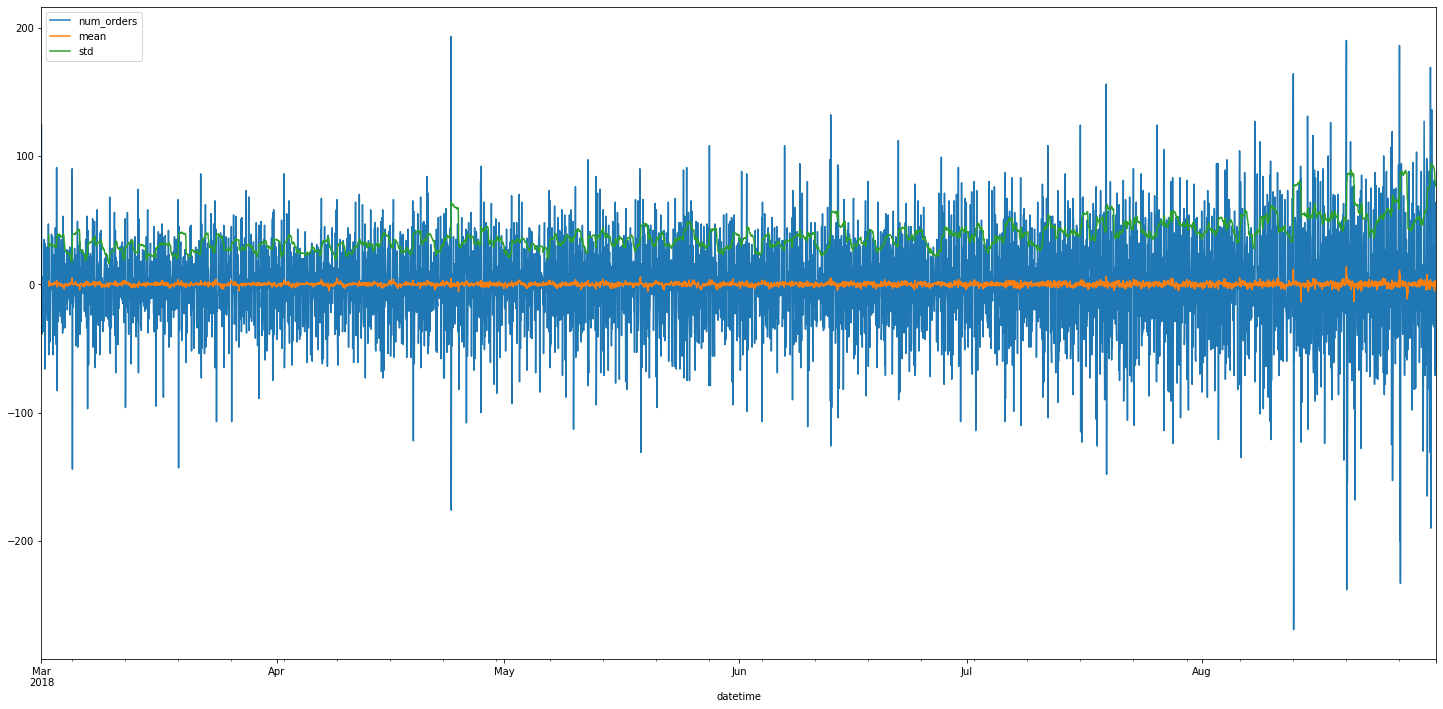

In [12]:
data_shift['mean'] = data_shift['num_orders'].rolling(24).mean() #зеленая
data_shift['std'] = data_shift['num_orders'].rolling(24).std() #оранжевая
data_shift.plot(figsize=figsize);


**Вывод:** Количество заказов растет, имеется суточная сезонность, ряд нестационарный, так как он подвержен изменению 

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b> 
    
Декомпозиция сделана верно. Хорошо, что сезонность была визуализирована на более коротком интервале)

## Обучение

в качестве признаков возьмем день недели и день.

In [13]:
# Создадим признаки для обучения модели
max_lag = 25
rolling_mean_size =50
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek #Календарные признаки
    data['hour'] = data.index.hour #Календарные признаки
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag) #«Отстающие значения»
   
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean() #Скользящее среднее

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
        
При генерации новых признаков желательно написать функцию, чтобы она возвращала новый датафрейм, а не изменяла глобальную переменную.
        
1. Это хорошая практика (не изменять глобальные переменные внутри функции), которая улучшает читаемость кода.
2. В какой-то момент может появиться необходимость подбирать некоторые параметры используемый внутри функции. В этот момент копирование датасета станет обязательным.

        
        
        
Для этого в внутри, в начале функции нужно задать новое имя датафрейму с `df.copy()`, в нем создать новые признаки, а в конце функции возвращать через `return` этот датафрейм
</div>

In [14]:
make_features(data,max_lag,100)

In [15]:
data = data.dropna()

In [16]:
train, test = train_test_split(
    data, shuffle=False, test_size=0.1)

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Хорошо, что деление происходит последовательно по времени

In [17]:
train = train.dropna()

In [18]:
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [19]:
state = np.random.RandomState(12345) #фиксируем значение для упрощения кода в дальнейшем

In [20]:
def RMSE(target, predict):
    return np.sqrt(mean_squared_error(target, predict))
   
#С помощию функции make_scorer создаю метрику RMSE
RMSE_score = make_scorer(RMSE, greater_is_better=False)

модель **DecisionTreeRegressor**

In [21]:
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
param_grid = {
    'max_depth': range(1, 16)
}
tree_model = DecisionTreeRegressor(random_state=state)
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid,cv=my_cv,scoring=RMSE_score, n_jobs=-1, verbose=2)
grid_search.fit(features_train, target_train)
best_tree = grid_search.best_params_

tree_score = grid_search.score(features_train, target_train) * (-1)
tree_score
print('RMSE для решающего дерева:', round(tree_score, 2))
print('Лучшие параметры ', best_tree )

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END .......................................

модель **RandomForestRegressor**

In [22]:
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
param_grid = {
    'n_estimators': range(5, 20, 5),
    'max_depth': range(1, 16, 3)
}
forest_model = RandomForestRegressor(random_state=state)
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid,cv=my_cv,scoring=RMSE_score)
grid_search.fit(features_train, target_train)
best_forest = grid_search.best_params_

forest_score = grid_search.score(features_train, target_train) * (-1)
print('RMSE для случайного леса:', round(forest_score, 2))
print('Лучшие параметры ', best_forest)

RMSE для случайного леса: 11.6
Лучшие параметры  {'max_depth': 13, 'n_estimators': 15}


модель **LGBMRegressor**

In [23]:
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
param_grid = {
     'max_depth': [10],
     'n_estimators': [40]
}
lgbm_model = LGBMRegressor(random_state=state)
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid,cv=my_cv,scoring=RMSE_score)
grid_search.fit(features_train, target_train)
best_lgbm = grid_search.best_params_

lgbm_score = grid_search.score(features_train, target_train) * (-1)
print('RMSE для  LGBMRegressor:', round(lgbm_score, 2))
print('Лучшие параметры ', best_lgbm)

RMSE для  LGBMRegressor: 16.77
Лучшие параметры  {'max_depth': 10, 'n_estimators': 40}


**комментарий для ревьюера**

делала изначально с подбором параметров, но при последующих запусках очень долго прогружалось, ну прям очень, больше 30 минут, не знаю с чем это связано, поэтому зафиксировала лучшие параметры и делалa уже с ними.Думаю это не критично, так как в задание вообще не просили подбирать параметры.

**Линейная регрессия**

In [24]:
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
linreg_model = LinearRegression(fit_intercept=True, n_jobs=None, normalize=True)
linreg_model.fit(features_train, target_train)
linreg_cv_score = pd.Series(cross_val_score(linreg_model,features_train,target_train,scoring=RMSE_score,cv=my_cv)).mean()*(-1)

print('RMSE для  LinearRegression:', round(linreg_cv_score, 2))

RMSE для  LinearRegression: 28.3


 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера  <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

</b> Ячейка выше не отработала. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub `Kernel` и `Restart & Run All`. Исправь, пожалуйста.

А у меня все работает, хм, странно, прикладываю фото сработанного кода ниже

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

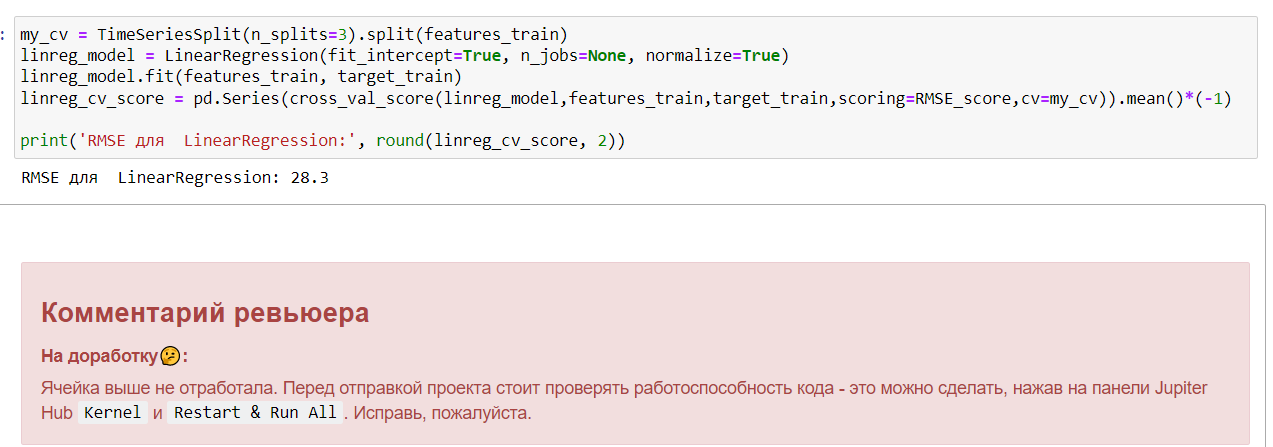
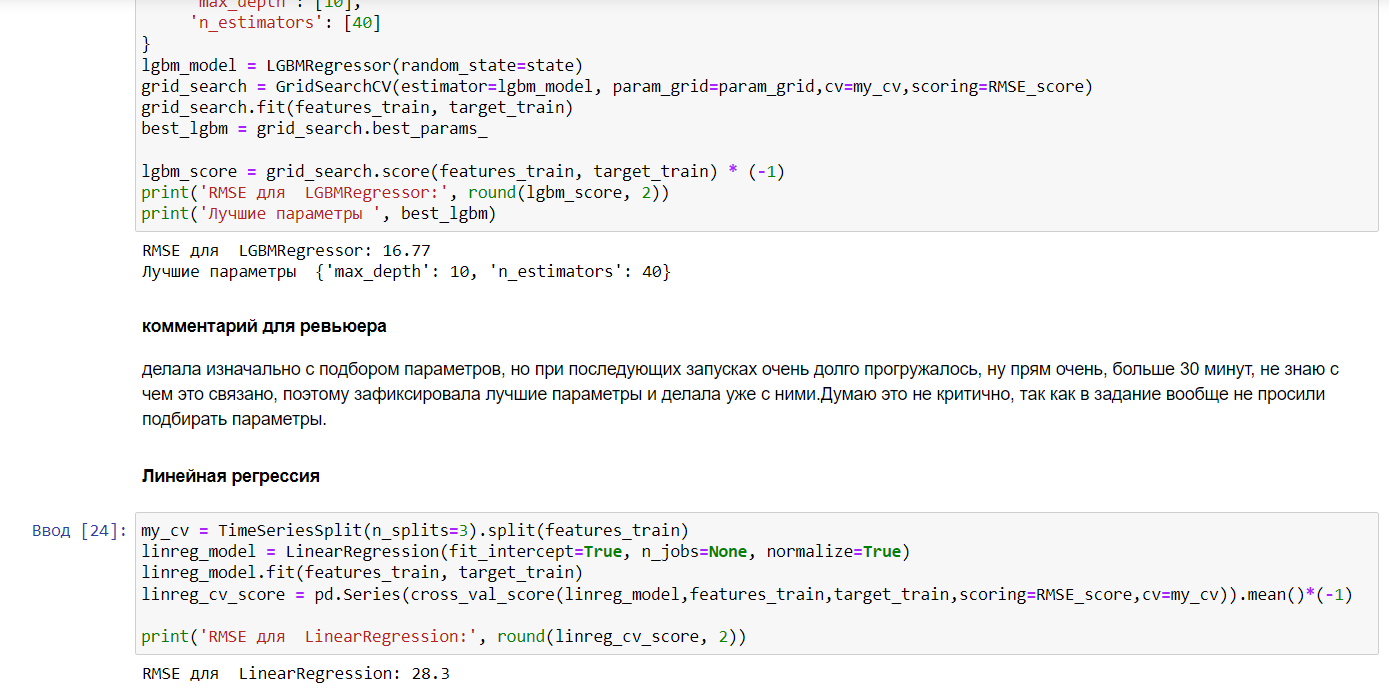

**Вывод** 
После обучения модели мы получили следующие показатели:

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Отлично, что применяется TimeSeriesSplit, а не простой cv

In [25]:
df = [  [24.96],
        [11.62],
        [16.77],
        [28.41]]
model = [ "DecisionTreeRegressor", "RandomForestRegressor", "LGBMRegressor", 'LinearRegression']
pd.DataFrame(data=df, index=model, columns=["RMSE"])

,RMSE
DecisionTreeRegressor,24.96
RandomForestRegressor,11.62
LGBMRegressor,16.77
LinearRegression,28.41


модель RandomForestRegressor показала самый лучший показатель метрики 

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Молодец, что пробуешь разные модели в этом шаге)
</div>

## Тестирование

На тестовой выборке проверяется модель, которая показала лучший результат на валидации, для подстраховки прооверим первые две по метрике RMSE модели)

RMSE модели Случайного леса: 43.78


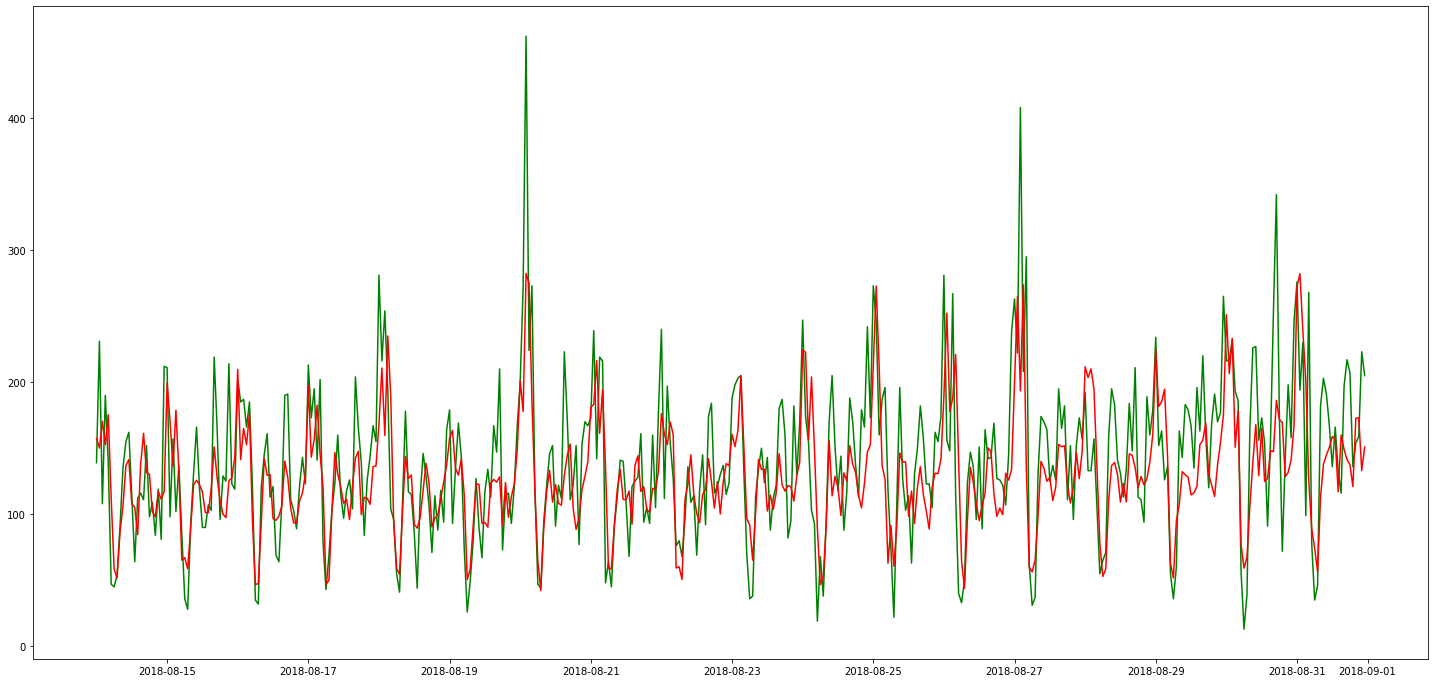

In [26]:
model = RandomForestRegressor(random_state=state,
                                     max_depth=13,
                                     n_estimators = 15)
model.fit(features_train, target_train)
target_predict = model.predict(features_test)

model_RMSE = round(RMSE(target_test, target_predict), 2)
print('RMSE модели Случайного леса:', model_RMSE)

plt.figure(figsize=figsize)
plt.plot(target_test.index, 
         target_test, 
         'g-', 
         target_test.index, 
         target_predict,
         'r-');

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
    
На тестовой выборке получено хорошее качество (она у нас играет роль отложенной, holdout), но знай, что тестирование положено проводить для одной лучшей модели. На предыдущем шаге мы должны были настроить модели и выбрать одну наилучшую, опираясь на метрики данные заказчиком (это может быть качество, время обучения, скорость предсказания и т.д.). Тестированием мы моделируем работу модели на новых незнакомых ей данных, которые ни разу не использовались ни при тренировке, ни при валидации, и проверяем, не словили ли мы переобучение. А эти данные могут быть смещенными, с выбросами и т.д. То есть по таким данным некорректно заново переопределять модель-победитель.  Советую тебе статью, рассматривающую разные способы валидации моделей машинного обучения: https://towardsdatascience.com/validating-your-machine-learning-model-25b4c8643fb7
        
Метрики качества на тестовой выборке для всех моделей можно вычислить только с целью исследования их смещения относительно аналогичных метрик на кросс-валидации/ валидационной выборке. Но это не означает, что модель-победитель должна выбираться исходя из сравнения метрик, полученных на тестовой выборке.   

RMSE модели LGBMRegressor: 42.54


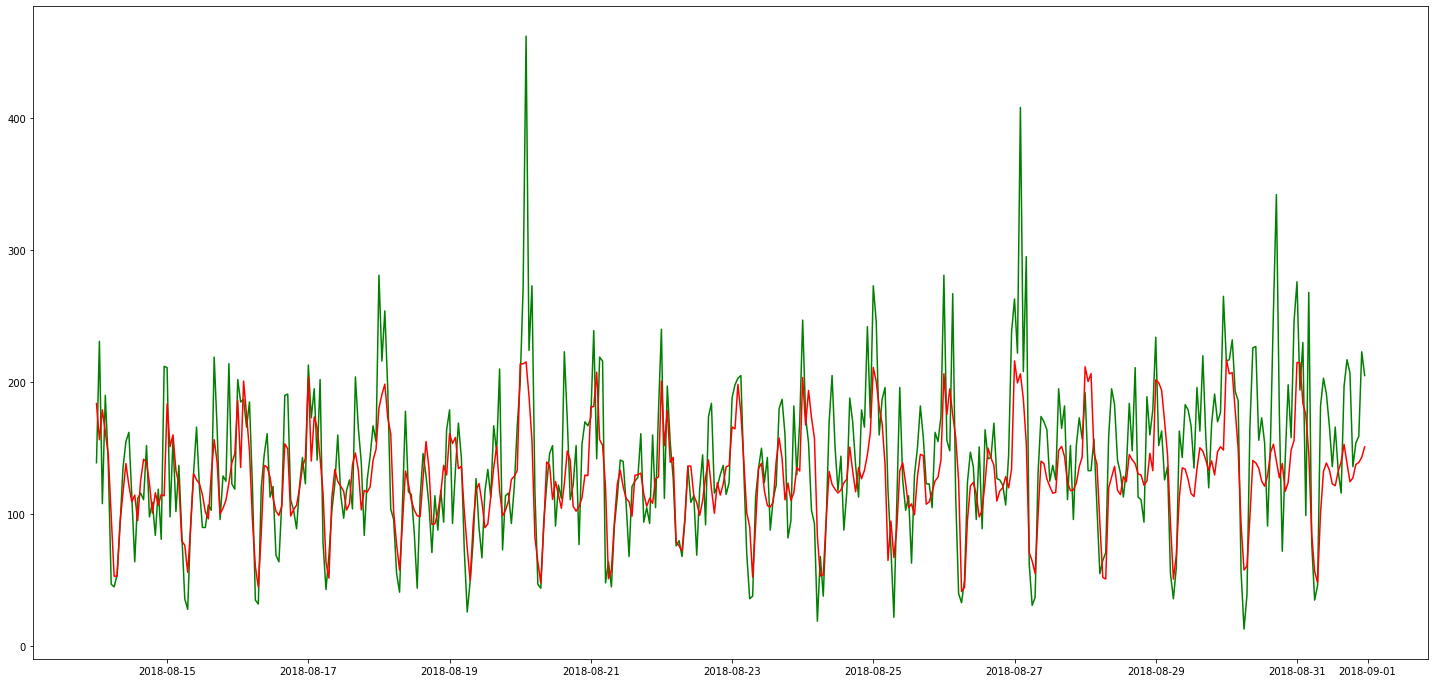

In [27]:
model_1 = LGBMRegressor(random_state=state,max_depth=15,n_estimators=40)
model_1.fit(features_train, target_train)
target_predict = model_1.predict(features_test)

model_1_RMSE = round(RMSE(target_test, target_predict), 2)
print('RMSE модели LGBMRegressor:', model_1_RMSE)

plt.figure(figsize=figsize)
plt.plot(target_test.index, 
         target_test, 
         'g-', 
         target_test.index, 
         target_predict,
         'r-');

Обе модели выполнили условие и их показатель RMSE < 48

На тестовой выборке LGBMRegressor имеет лучший показатель.

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Отлично, что  визуализированы результаты, показаны предсказанные значения лучшей модели и реальные тестовые

**Вывод**
- Изначально файл был проверен на пропуски, последовательность индексов 
- При выводе графиков с сезонностью и трендом, видно, что присутствует  суточная сезонность и тренд к росту кол-ва заказов.
- При подготовке данных к обучению мы добавили новые признаки - день недели, час, скользящее среднее и отстающие значения.
- Обучение моделей прошло успешно. рассматривали метрику RMSE. Результаты получились следующие 

DecisionTreeRegressor	24.96

RandomForestRegressor	11.62

LGBMRegressor	16.77

LinearRegression	28.41

- Из 4 моделей выбрали две с наилучшей метрикой и провели на них тестирование, каждой из которыхудалось достичь требуемого показателя метрики RMSE(RMSE < 48). Наилучший показатель RMSE в данном случае у **LGBMRegressor = 41.58**
- Рекомендовать к использованию можно именно LGBMRegressor, так как у нее с помощью определенных параметров можно достичь еще лучшего показателя качества


<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с этим проектом. Молодец! Подготовлены данные для анализа, изучен каждый параметр. Все красиво визуализировано, построено несколько моделей регрессии и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались  функции, помогающие избавиться от дублирования кода;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использована валидация и поиск гиперпараметров.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера 2 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально. Принимаю работу)
    
Если хочешь лучше разобраться в теме, то могу посоветовать тебе: 
    
Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k    
    
Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A
    
Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing
    
Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg
https://facebook.github.io/prophet/
    
https://facebook.github.io/prophet/docs/quick_start.html#python-api
    
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb  
    
    
    
В этом проекте были отработаны все моменты. 
    
Успехов тебе в следующем спринте!
    
Рад был помочь тебе)
    
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48